In [ ]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tf.__version__

'2.2.0'

In [ ]:
x_data = [[0, 0],
         [0, 1],
         [1, 0],
         [1, 1]]

#XOR-gate         
y_data = [[0],
          [1],
          [1],
          [0]]
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

In [ ]:
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

In [ ]:
W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

In [ ]:
W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

In [ ]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
#train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

In [ ]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [ ]:
sess = tf.Session()

In [ ]:
sess.run(tf.global_variables_initializer())

In [ ]:
vcost =[]

In [ ]:
for step in range(30001):
    
    cost1, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
    vcost.append(cost1)
    if step %1000 ==0:
       
       
       print(cost1)

0.70431876
0.64201903
0.5211788
0.4370427
0.3983187
0.37811646
0.3665048
0.35943103
0.35497034
0.35209817
0.3502254
0.3489943
0.3481812
0.34764266
0.34728515
0.3470472
0.34688902
0.34678364
0.34671336
0.34666675
0.34663588
0.34661523
0.34660143
0.34659258
0.34658706
0.34658307
0.3465803
0.34657863
0.34657747
0.34657663
0.34657598


Text(0.5, 0, 'epoch')

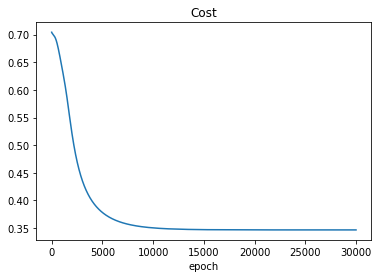

In [ ]:
plt.plot(vcost)
plt.title('Cost')
plt.xlabel('epoch')

In [ ]:
test1 = sess.run(hypothesis, feed_dict={X:[[0.1,0]]})


In [ ]:
print(test1[0][0])

2.6421205e-05


In [ ]:
for i in range(4):
  test1 = sess.run(hypothesis, feed_dict={X:[x_data[i]]})
  print(i, x_data[i], y_data[i] , '---- predicted : ',test1)

0 [0. 0.] [0.] ---- predicted :  [[3.5091764e-06]]
1 [0. 1.] [1.] ---- predicted :  [[0.9999974]]
2 [1. 0.] [1.] ---- predicted :  [[0.50000745]]
3 [1. 1.] [0.] ---- predicted :  [[0.50000894]]


In [ ]:
acc1 = sess.run(accuracy, feed_dict={X: x_data, Y: y_data})
print(acc1)

0.75


In [ ]:
test1 = sess.run(hypothesis, feed_dict={X:[[0.1,0]]})